In [1]:
# matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
import matplotlib

In [3]:
datadir = '/home/tamarnat/gem5-accuracy-evaluation/micro-experiments/results/X86/'
plotdir = '/home/tamarnat/gem5art-experiments/documents/sim-objects/images/'

In [4]:
controlBenchmarks = ['CCa','CCm','CCe','CCh','CCh_st','CCl','CF1','CRd','CRf','CRm','CS1','CS3']
#controlBenchmarks = ['CCa','CCm','CCe','CCh','CCh_st','CF1','CRd','CRf','CRm','CS1','CS3']
memoryTypes = ['Inf', 'SingleCycle', 'Slow']
cpuTypes1 = ['Simple']
cpuTypes2 = ['O3']
branchPredictors = ['Local','BiMode', 'Tournament', 'LTAGE']
targetbuffers = ['indirect', 'BTB[512]']
#targetbuffers = ['indirect','BTB[1024]', 'BTB[512]']

In [5]:
# function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
        return float(r[start:end])

In [6]:
# data frame for KVM CPU
rows = []
for target in targetbuffers:
    if target == 'indirect': path = datadir + 'indirect'
    elif target == 'BTB[1024]': path = datadir + 'BTB'
    elif target == 'BTB[512]': path = datadir + 'temp/BTB'
    for mem in memoryTypes:
        for bm in controlBenchmarks:
            for cpu in cpuTypes1:
                for bp in branchPredictors:
                    cdir = path + '/' + bp + '/' + cpu + '/' + mem + '/' + bm + '/'
                    rows.append([target,mem, bm, cpu, bp, 
                                 gem5GetStat(cdir, 'sim_insts'),
                                 gem5GetStat(cdir, 'sim_ticks')/1e12,
                                 gem5GetStat(cdir, 'system.cpu.BranchMispred'),
                                 gem5GetStat(cdir, 'system.cpu.Branches'),
                                 gem5GetStat(cdir, 'system.cpu.branchPred.BTBLookups'),        # Number of BTB lookups
                                 gem5GetStat(cdir, 'system.cpu.branchPred.RASInCorrect'),      # Number of incorrect RAS predictions.
                                 gem5GetStat(cdir, 'system.cpu.branchPred.usedRAS'),           # Number of times the RAS was used to get a target
                                 gem5GetStat(cdir, 'system.cpu.branchPred.condIncorrect'),
                                 gem5GetStat(cdir, 'system.cpu.branchPred.condPredicted'),
                                 gem5GetStat(cdir, 'system.cpu.branchPred.indirectHits'),
                                 gem5GetStat(cdir, 'system.cpu.branchPred.indirectLookups'),
                                 gem5GetStat(cdir, 'system.cpu.branchPred.indirectMisses'),
                                 gem5GetStat(cdir, 'system.cpu.branchPredindirectMispredicted'),
                                 gem5GetStat(cdir, 'system.cpu.branchPred.lookups'),
                                 gem5GetStat(cdir, 'host_seconds')]) 


                
df_Simple = pd.DataFrame(rows, columns=['Tbuffer', 'memoryType', 'benchmark', 'cpu', 'bp', 'instructions', 'sim_time', 'BranchMispredicted',
                                         'noOfBranches', 'BTBLookups','RASInCorrect', 'RASused', 'condIncorrect', 
                                         'condPredicted', 'indirectHits', 'indirectLookups','indirectMisses','indirectMispredicted', 
                                         'lookups','host_seconds'])
df_Simple['condMissRate'] = (df_Simple['condIncorrect']/df_Simple['condPredicted'])*100
df_Simple['noOfUncond'] = (df_Simple['noOfBranches'] - df_Simple['condPredicted'])
df_Simple['indirectMissRate'] = (df_Simple['indirectMispredicted']/df_Simple['indirectHits'])*100
df_Simple['branchMissRate'] = ((df_Simple['BranchMispredicted'])/(df_Simple['noOfBranches']))*100
df_Simple['noOfDirectBranches'] = ((df_Simple['BTBLookups']) - (df_Simple['indirectLookups']))

In [7]:
# data frame for KVM CPU
rows = []
for target in targetbuffers:
    if target == 'indirect': path = datadir + 'indirect'
    elif target == 'BTB[1024]': path = datadir + 'BTB'
    elif target == 'BTB[512]': path = datadir + 'temp/BTB'
    for mem in memoryTypes:
        for bm in controlBenchmarks:
            for cpu in cpuTypes2:
                for bp in branchPredictors:
                    cdir = path + '/' + bp + '/' + cpu + '/' + mem + '/' + bm + '/'            
                    rows.append([target, mem, bm, cpu, bp, 
                             gem5GetStat(cdir, 'sim_insts'),
                             gem5GetStat(cdir, 'sim_ticks')/1e12,
                             gem5GetStat(cdir, 'system.cpu.branchPred.usedRAS'),           # Number of times the RAS was used to get a target
                             gem5GetStat(cdir, 'system.cpu.branchPred.condIncorrect'),
                             gem5GetStat(cdir, 'system.cpu.branchPred.condPredicted'),
                             gem5GetStat(cdir, 'system.cpu.branchPred.indirectHits'),
                             gem5GetStat(cdir, 'system.cpu.branchPred.indirectLookups'),
                             gem5GetStat(cdir, 'system.cpu.branchPred.indirectMisses'),
                             gem5GetStat(cdir, 'system.cpu.branchPredindirectMispredicted'),
                             gem5GetStat(cdir, 'system.cpu.branchPred.lookups'),
                             gem5GetStat(cdir, 'system.cpu.ipc'),
                             gem5GetStat(cdir, 'system.cpu.commit.branches'),
                             gem5GetStat(cdir, 'system.cpu.commit.branchMispredicts'),
                             gem5GetStat(cdir, 'host_seconds')]) 
                
                
                
df_O3 = pd.DataFrame(rows, columns=['Tbuffer','memoryType', 'benchmark', 'cpu', 'bp', 'instructions', 'sim_time', 'RASused', 'condIncorrect', 
                                         'condPredicted', 'indirectHits', 'indirectLookups','indirectMisses','indirectMispredicted', 
                                         'lookups', 'ipc', 'noOfBranches', 'branchMispredicts', 'host_seconds'])
df_O3['condMissRate'] = (df_O3['condIncorrect']/df_O3['condPredicted'])*100
df_O3['indirectMissRate'] = (df_O3['indirectMispredicted']/df_O3['indirectHits'])*100
df_O3['branchMissRate'] = (df_O3['branchMispredicts']/df_O3['noOfBranches'])*100

In [8]:
def plot_bar(tbuff, mems, cpus, benchmarks, bps, stat, norm=True):
    
    plt.figure()
    i = 0
    for target in tbuff:
        for mem in mems:
            for bm in benchmarks:
                for cpu in cpus:
                    if cpu == 'Simple': df = df_Simple
                    elif cpu == 'O3': df = df_O3
                    for j, bp in enumerate(bps):
                        if norm: 
                            base = df[(df['memoryType']==mem)][stat].iloc[0]
                        else: base = 1
                        a = df[(df['Tbuffer']==target) & (df['benchmark']==bm) & (df['memoryType']==mem) & 
                                      (df['cpu']==cpu) & (df['bp']==bp) ]
                        plt.bar(i, a[stat].iloc[0]/base, color='C'+str(j))
                        i += 1
                    i += 1
    i = 0
    for i,bp in enumerate(bps):
        plt.bar(0,0,color='C'+str(i), label=bp)
        plt.xticks(np.arange(len(benchmarks))*(len(bps)+1)+i/2, benchmarks, rotation=40, ha='right')

In [9]:
def sublplot_bar(tbuff, cpus, stat, ax1_title, ax2_title, ylabel):
    # Create Figure and Subplots
    figure, (ax1, ax2) = plt.subplots(2,1, sharex=False, sharey=False, dpi=120)

    # Plot
    i = 0
    for target in tbuff:
        for mem in mems:
            for bm in controlBenchmarks:
                for cpu in cpus:
                    if cpu == 'Simple': df = df_Simple
                    elif cpu == 'O3': df = df_O3
                    for j, bp in enumerate(branchPredictors):
                        a = df[(df['Tbuffer']==target) & (df['benchmark']==bm) & (df['memoryType']==mem) & (df['cpu']==cpu) & (df['bp']==bp)]
                        ax1.bar(i, a[stat].iloc[0], color= 'C'+str(j))
                        ax2.bar(i, a[stat].iloc[0], color= 'C'+str(j))
                        i += 1
                    i += 1
    
    i = 0
    for i,bp in enumerate(controlBenchmarks):
        plt.bar(0,0,color='C'+str(i), label=bp)
        ax1.set_xticklabels(controlBenchmarks, rotation=40, ha='right')
        ax2.set_xticklabels(controlBenchmarks, rotation=40, ha='right')
    
    # Title, X and Y labels  
    x = np.arange(len(controlBenchmarks)+1)
    #ax1.set_xticks(x);ax2.set_xticks(x);ax2.set_xticks(x)
    #ax1.set_xticklabels(benchmarks, rotation=40, ha='right');ax2.set_xticklabels(benchmarks, rotation=40, ha='right')
    ax1.set_ylabel(ylabel);ax2.set_ylabel(ylabel);
    ax1.set_title(ax1_title);ax2.set_title(ax2_title);

In [10]:
def create_heatmap(tbuff,mems,cpus,bps,benchmarks,stat):
    c = []
    d = []
    b = 0
    for target in tbuff:
        #print(target)
        #print('*****************')
        #print('-----------------')
        for cpu in cpus:
            #print(cpu)
            #print('*****************')
            if cpu == 'Simple': df = df_Simple
            elif cpu == 'O3': df = df_O3
            for bp in bps:
                #print(bp)
                for bm in benchmarks:
                     a = df[(df['Tbuffer']==target) & (df['memoryType']== mem) & (df['cpu']==cpu) & 
                                        (df['benchmark']==bm) & (df['bp']==bp)]
                     b += a[stat].iloc[0]
                     #print(b)
                c.append(round(b/len(benchmarks),2))
                b = 0
            d.append(c)
            #print(c)
            c = []
    return d

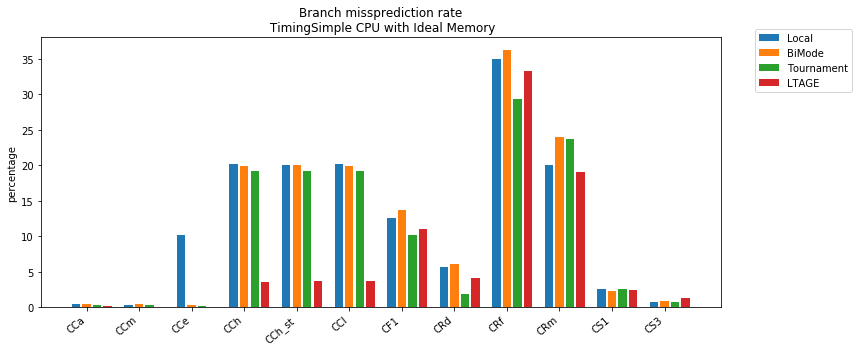

In [30]:
mems = ['Inf']
cpus = ['Simple']
tbuff = ['indirect']
#benchmarks = ['CCa','CCm','CCe','CCh']
bps = ['Local','BiMode', 'Tournament', 'LTAGE']
stat = 'branchMissRate'
plot_title = 'Branch missprediction rate\n TimingSimple CPU with Ideal Memory'
ylabel = 'percentage'

# plot function
plot_bar(tbuff, mems, cpus, controlBenchmarks, bps, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5 
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory

plt.legend(bbox_to_anchor=(1.2, 1.05))

plt.tight_layout()
plt.savefig(plotdir + stat + '_timingSimple' + '.png', format='png', dpi=600)

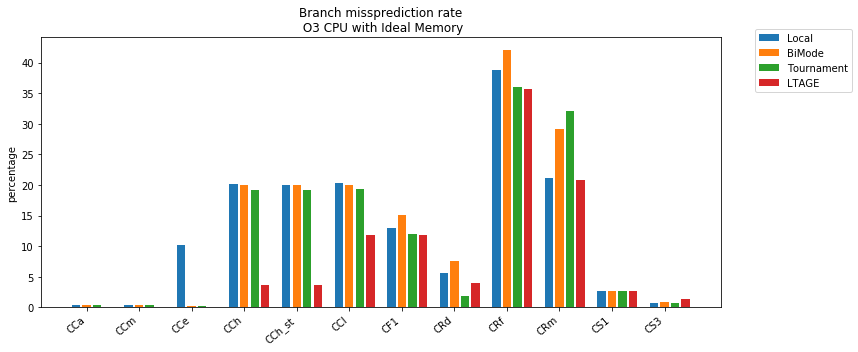

In [12]:
mems = ['Inf']
cpus = ['O3']
tbuff = ['indirect']
#benchmarks = ['CCa','CCm','CCe','CCh']
bps = ['Local','BiMode', 'Tournament', 'LTAGE']
stat = 'branchMissRate'
plot_title = 'Branch missprediction rate\n O3 CPU with Ideal Memory'
ylabel = 'percentage'

# plot function
plot_bar(tbuff, mems, cpus, controlBenchmarks, bps, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5 
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory

plt.legend(bbox_to_anchor=(1.2, 1.05))

plt.tight_layout()
plt.savefig(plotdir + stat + '_O3' + '.png', format='png', dpi=600)

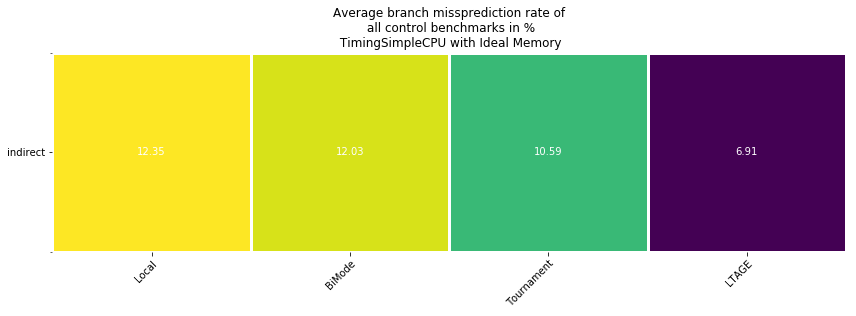

In [13]:
tbuff = ['indirect']
cpus = ['Simple'] 
mems = ['Inf']
benchmarks = controlBenchmarks
bps = branchPredictors
stat = 'branchMissRate'
data = create_heatmap(tbuff,mems,cpus,bps,benchmarks,stat)

data = np.array(data)
fig, ax = plt.subplots()
im = ax.imshow(data)


# We want to show all ticks...
ax.set_xticks(np.arange(len(bps)))
ax.set_yticks(np.arange(len(tbuff)))

# ... and label them with the respective list entries
ax.set_xticklabels(bps)
ax.set_yticklabels(tbuff)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xticks(np.arange(len(bps)+1)-0.5, minor=True)
ax.set_yticks(np.arange(len(tbuff)+1)-0.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=True)


# Loop over data dimensions and create text annotations.
for i in range(len(tbuff)):
    for j in range(len(bps)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")
        

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 3 
plt.rcParams["figure.figsize"] = fig_size

ax.set_title("Average branch missprediction rate of\n all control benchmarks in %\n TimingSimpleCPU with Ideal Memory")
fig.tight_layout()
plt.savefig(plotdir + stat + "_heatmap_comp"  + '.png', format='png', dpi=600)

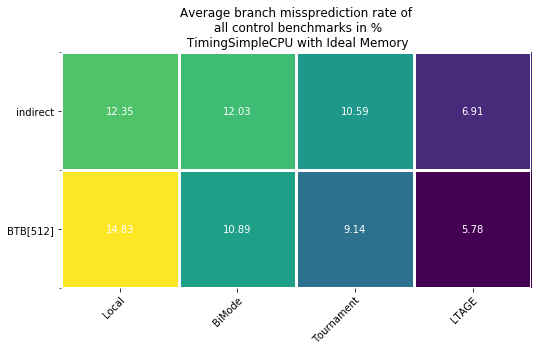

In [28]:
tbuff = targetbuffers
cpus = ['Simple'] 
mems = ['Inf']
benchmarks = controlBenchmarks
bps = branchPredictors
stat = 'branchMissRate'
data = create_heatmap(tbuff,mems,cpus,bps,benchmarks,stat)

data = np.array(data)
fig, ax = plt.subplots()
im = ax.imshow(data)


# We want to show all ticks...
ax.set_xticks(np.arange(len(bps)))
ax.set_yticks(np.arange(len(tbuff)))

# ... and label them with the respective list entries
ax.set_xticklabels(bps)
ax.set_yticklabels(tbuff)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xticks(np.arange(len(bps)+1)-0.5, minor=True)
ax.set_yticks(np.arange(len(tbuff)+1)-0.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=True)


# Loop over data dimensions and create text annotations.
for i in range(len(tbuff)):
    for j in range(len(bps)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")
        

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 4 
plt.rcParams["figure.figsize"] = fig_size

ax.set_title("Average branch missprediction rate of\n all control benchmarks in %\n TimingSimpleCPU with Ideal Memory")
fig.tight_layout()
plt.savefig(plotdir + stat + "_heatmap_tbuff_comp"  + '.png', format='png', dpi=600)

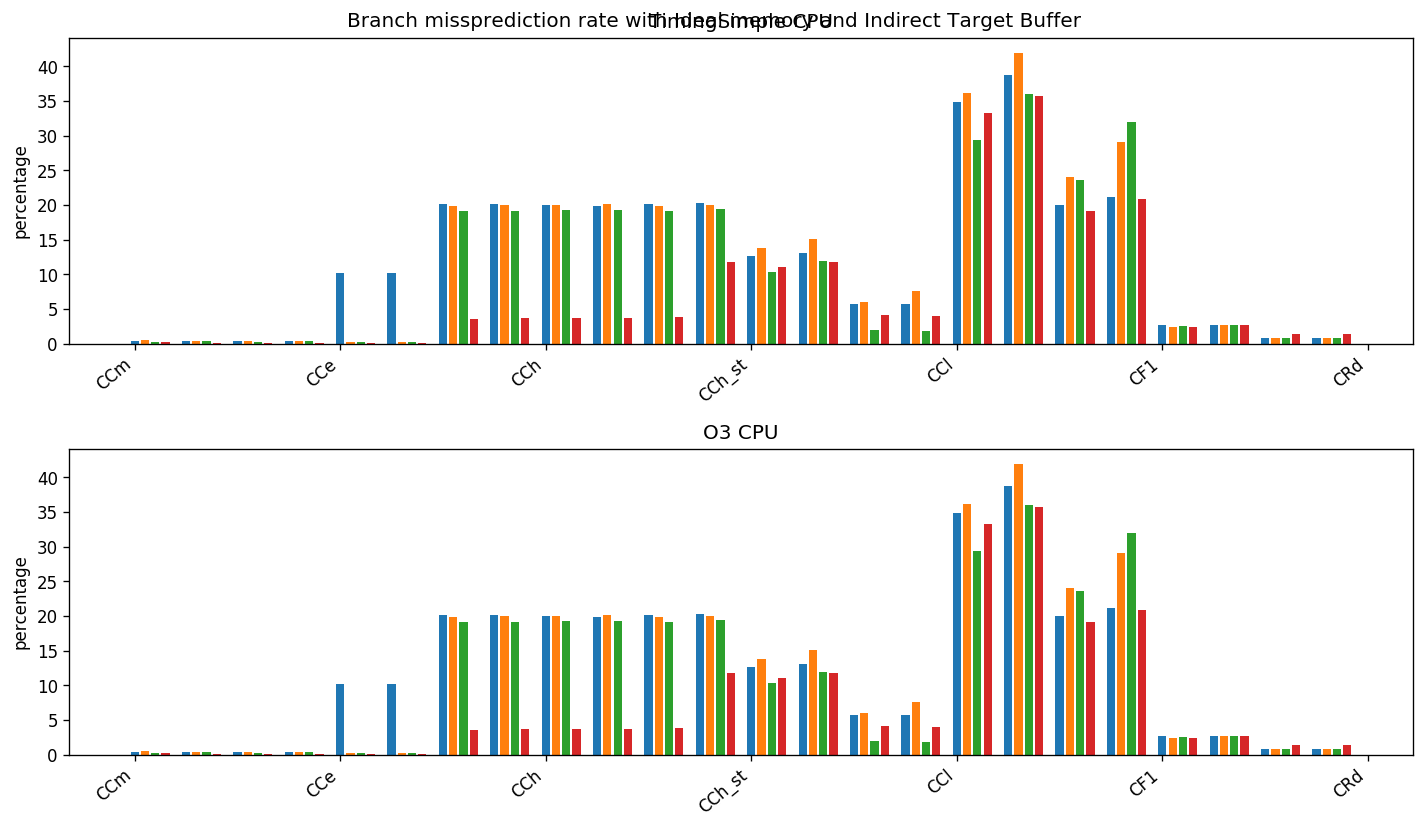

In [15]:
stat = 'branchMissRate'
cpus = ['Simple', 'O3']
mems = ['Inf']
tbuff = ['indirect']
benchmarks = controlBenchmarks
bps = branchPredictors

ax1_title = 'TimingSimple CPU'
ax2_title = 'O3 CPU'
y_label = 'percentage'

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

sublplot_bar(tbuff, cpus, stat, ax1_title, ax2_title, ylabel)

# plot directory
 # plt.legend(loc=1, prop={'size': 8})
plt.suptitle('Branch missprediction rate with Ideal memory and Indirect Target Buffer\n')
plt.tight_layout()
plt.savefig(plotdir + stat + '_subplot_CPU_comp' + '.png', format='png', dpi=600)

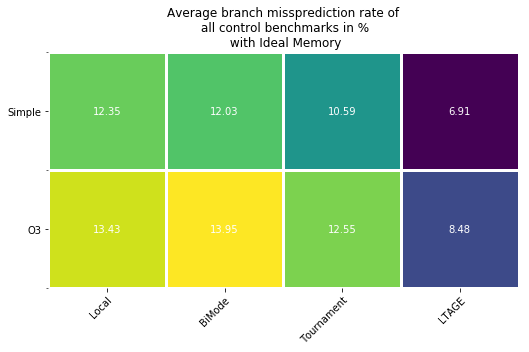

In [26]:
tbuff = ['indirect']
cpus = ['Simple', 'O3'] 
mems = ['Inf']
benchmarks = controlBenchmarks
bps = branchPredictors
stat = 'branchMissRate'
data = create_heatmap(tbuff,mems,cpus,bps,benchmarks,stat)

data = np.array(data)
fig, ax = plt.subplots()
im = ax.imshow(data)


# We want to show all ticks...
ax.set_xticks(np.arange(len(bps)))
ax.set_yticks(np.arange(len(cpus)))

# ... and label them with the respective list entries
ax.set_xticklabels(bps)
ax.set_yticklabels(cpus)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xticks(np.arange(len(bps)+1)-0.5, minor=True)
ax.set_yticks(np.arange(len(cpus)+1)-0.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=True)


# Loop over data dimensions and create text annotations.
for i in range(len(cpus)):
    for j in range(len(bps)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")
        

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5 
plt.rcParams["figure.figsize"] = fig_size

ax.set_title("Average branch missprediction rate of\n all control benchmarks in %\n with Ideal Memory")
fig.tight_layout()
plt.savefig(plotdir + stat + "_heatmap_CPU_comp"  + '.png', format='png', dpi=600)

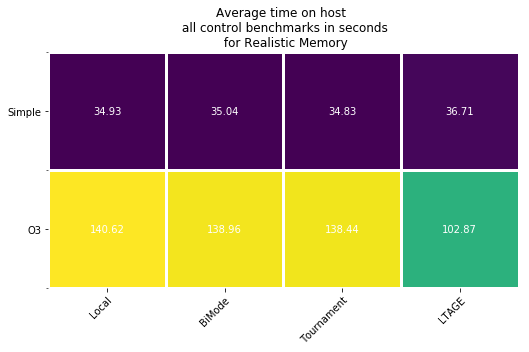

In [27]:
tbuff = ['indirect']
cpus = ['Simple', 'O3'] 
mems = ['Slow']
benchmarks = controlBenchmarks
bps = branchPredictors
stat = 'host_seconds'
data = create_heatmap(tbuff,mems,cpus,bps,benchmarks,stat)

data = np.array(data)
fig, ax = plt.subplots()
im = ax.imshow(data)


# We want to show all ticks...
ax.set_xticks(np.arange(len(bps)))
ax.set_yticks(np.arange(len(cpus)))

# ... and label them with the respective list entries
ax.set_xticklabels(bps)
ax.set_yticklabels(cpus)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xticks(np.arange(len(bps)+1)-0.5, minor=True)
ax.set_yticks(np.arange(len(cpus)+1)-0.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=True)


# Loop over data dimensions and create text annotations.
for i in range(len(cpus)):
    for j in range(len(bps)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")
        

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5 
plt.rcParams["figure.figsize"] = fig_size

ax.set_title("Average time on host \n all control benchmarks in seconds\n for Realistic Memory")
fig.tight_layout()
plt.savefig(plotdir + stat + "_heatmap_hostTime_comp"  + '.png', format='png', dpi=600)

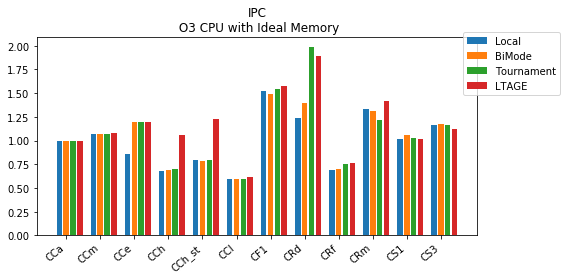

In [18]:
mems = ['Inf']
cpus = ['O3']
tbuff = ['indirect']
#benchmarks = ['CCa','CCm','CCe','CCh']
bps = ['Local','BiMode', 'Tournament', 'LTAGE']
stat = 'ipc'
plot_title = 'IPC\n O3 CPU with Ideal Memory'
ylabel = ''

# plot function
plot_bar(tbuff, mems, cpus, controlBenchmarks, bps, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5 
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory

plt.legend(bbox_to_anchor=(1.2, 1.05))

plt.tight_layout()
plt.savefig(plotdir + stat + '_O3' + '.png', format='png', dpi=600)

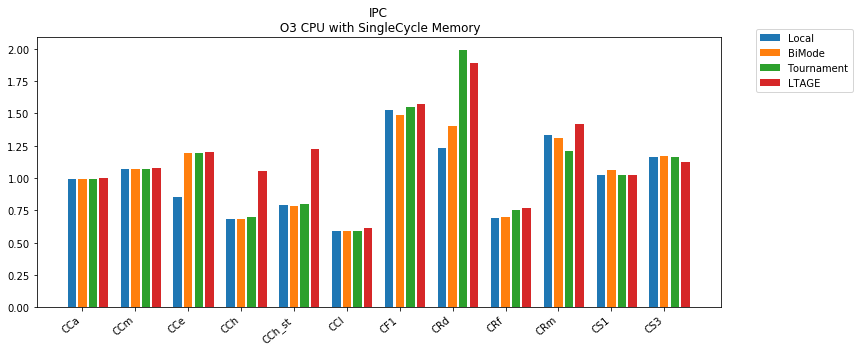

In [19]:
mems = ['SingleCycle']
cpus = ['O3']
tbuff = ['indirect']
#benchmarks = ['CCa','CCm','CCe','CCh']
bps = ['Local','BiMode', 'Tournament', 'LTAGE']
stat = 'ipc'
plot_title = 'IPC\n O3 CPU with SingleCycle Memory'
ylabel = ''

# plot function
plot_bar(tbuff, mems, cpus, controlBenchmarks, bps, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5 
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory

plt.legend(bbox_to_anchor=(1.2, 1.05))

plt.tight_layout()
plt.savefig(plotdir + stat + '_O3' + '.png', format='png', dpi=600)

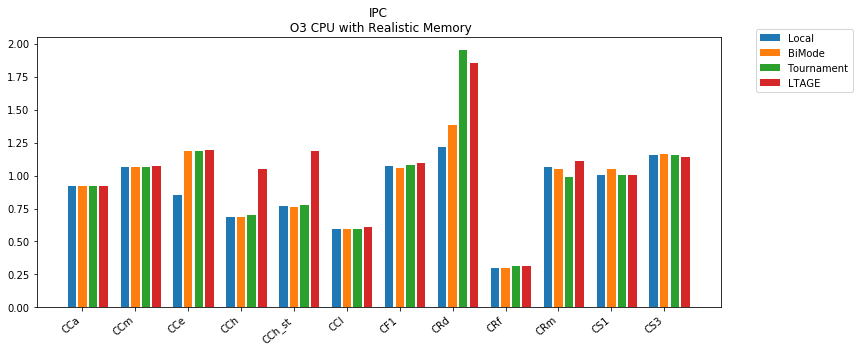

In [20]:
mems = ['Slow']
cpus = ['O3']
tbuff = ['indirect']
#benchmarks = ['CCa','CCm','CCe','CCh']
bps = ['Local','BiMode', 'Tournament', 'LTAGE']
stat = 'ipc'
plot_title = 'IPC\n O3 CPU with Realistic Memory'
ylabel = ''

# plot function
plot_bar(tbuff, mems, cpus, controlBenchmarks, bps, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5 
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory

plt.legend(bbox_to_anchor=(1.2, 1.05))

plt.tight_layout()
plt.savefig(plotdir + stat + '_O3' + '.png', format='png', dpi=600)

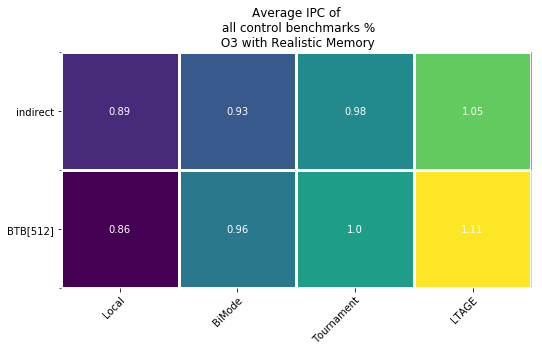

In [31]:
tbuff = targetbuffers
cpus = ['O3'] 
mems = ['Slow']
benchmarks = controlBenchmarks
bps = branchPredictors
stat = 'ipc'
data = create_heatmap(tbuff,mems,cpus,bps,benchmarks,stat)

data = np.array(data)
fig, ax = plt.subplots()
im = ax.imshow(data)


# We want to show all ticks...
ax.set_xticks(np.arange(len(bps)))
ax.set_yticks(np.arange(len(tbuff)))

# ... and label them with the respective list entries
ax.set_xticklabels(bps)
ax.set_yticklabels(tbuff)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xticks(np.arange(len(bps)+1)-0.5, minor=True)
ax.set_yticks(np.arange(len(tbuff)+1)-0.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=True)


# Loop over data dimensions and create text annotations.
for i in range(len(tbuff)):
    for j in range(len(bps)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")
        

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 4 
plt.rcParams["figure.figsize"] = fig_size

ax.set_title("Average IPC of\n all control benchmarks %\n O3 with Realistic Memory")
fig.tight_layout()
plt.savefig(plotdir + stat + "_heatmap_comp"  + '.png', format='png', dpi=600)